### Clean Juneau Snow Depth Timeseries Data 

Notebook contents 
* Load the Powder Patch data, and the SNOTEL data, and clean them together here 
* Produce a few figures of them together 

created by Cassie Lumbrazo\
last updated: Oct 2025\
run location: UAS linux\
python environment: **xarray**

In [3]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import scipy

In [4]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [5]:
pwd

'/home/cassie/python/repos/snowdepth_teleconnections'

SNOTEL Data first loaded in `2_snotel_data.ipynb`

In [6]:
filename = '/hdd/snow_hydrology/met_station/snotel/heenlatinee/site1270_hourly_2016_2025.nc' # lightly cleaned snotel data 

# open the netcdf 
ds_site1270 = xr.open_dataset(filename)
ds_site1270

<xarray.Dataset> Size: 8MB
Dimensions:   (datetime: 79654)
Coordinates:
  * datetime  (datetime) datetime64[ns] 637kB 2015-10-01 ... 2025-09-30T23:00:00
Data variables:
    site_id   (datetime) int32 319kB ...
    swe       (datetime) float64 637kB ...
    precip1   (datetime) float64 637kB ...
    precip2   (datetime) float64 637kB ...
    temp      (datetime) float64 637kB ...
    hs        (datetime) float64 637kB ...
    bat       (datetime) float64 637kB ...
    wdir      (datetime) float64 637kB ...
    ws_x      (datetime) float64 637kB ...
    ws_v      (datetime) float64 637kB ...
    rh        (datetime) float64 637kB ...
    pres      (datetime) float64 637kB ...

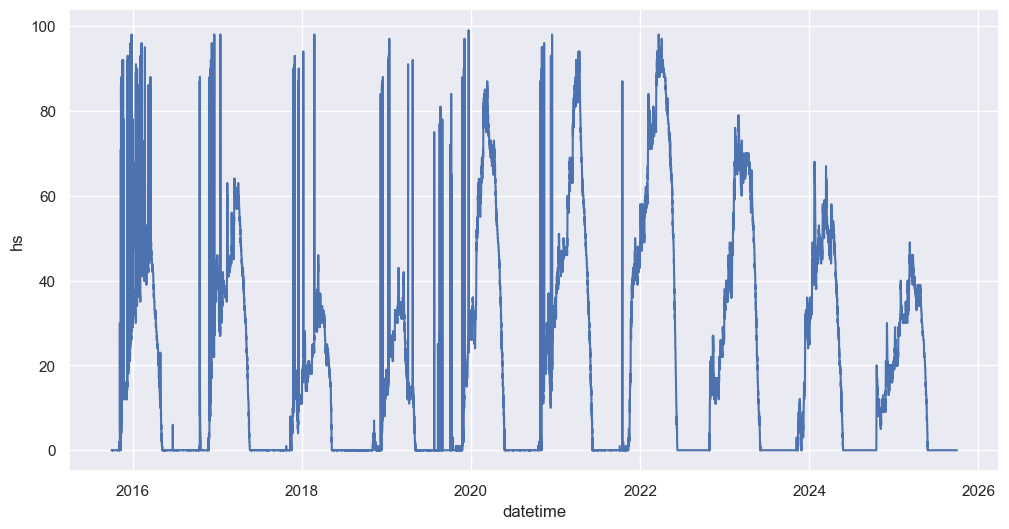

In [7]:
ds_site1270['hs'].plot()

Now, I need to do the same for the Powder Patch dataset (lightly cleaned in `1_load_all_powderpatch.ipynb` then saved as netcdf)

In [13]:
# For now, I am just loadign the raw data from synoptic but I should go back and get the microspecialties download + mesonet to make the full dataset 
filename = '/home/cassie/data/fishcreek/mesowest/rawdata/PPSA2_Synoptic_everything_utc_time_remove_header.csv'
df_mesowest= pd.read_csv(filename, sep = ",", low_memory=False)

# Convert 'Date_Time' to datetime, skipping the first row (units row)
df_mesowest = df_mesowest.iloc[1:].copy()
df_mesowest['datetime'] = pd.to_datetime(df_mesowest['Date_Time'], utc=True)
# set datetime as the index
df_mesowest.set_index('datetime', inplace=True)
df_mesowest.head()

,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,snow_depth_set_1,precip_accum_set_1,volt_set_1,snow_interval_set_1,heat_index_set_1d,dew_point_temperature_set_1d
datetime,,,,,,,,,,
2014-01-09 15:00:00+00:00,PPSA2,2014-01-09T15:00:00Z,-1.43,91.9,NaN,NaN,NaN,NaN,NaN,-2.59
2014-01-09 15:30:00+00:00,PPSA2,2014-01-09T15:30:00Z,-1.38,92.0,NaN,NaN,NaN,NaN,NaN,-2.53
2014-01-09 16:00:00+00:00,PPSA2,2014-01-09T16:00:00Z,-1.38,91.9,NaN,NaN,NaN,NaN,NaN,-2.54
2014-01-09 16:30:00+00:00,PPSA2,2014-01-09T16:30:00Z,-1.38,91.9,NaN,NaN,NaN,NaN,NaN,-2.54
2014-01-09 17:00:00+00:00,PPSA2,2014-01-09T17:00:00Z,-1.38,91.8,NaN,NaN,NaN,NaN,NaN,-2.56


<Axes: xlabel='datetime'>

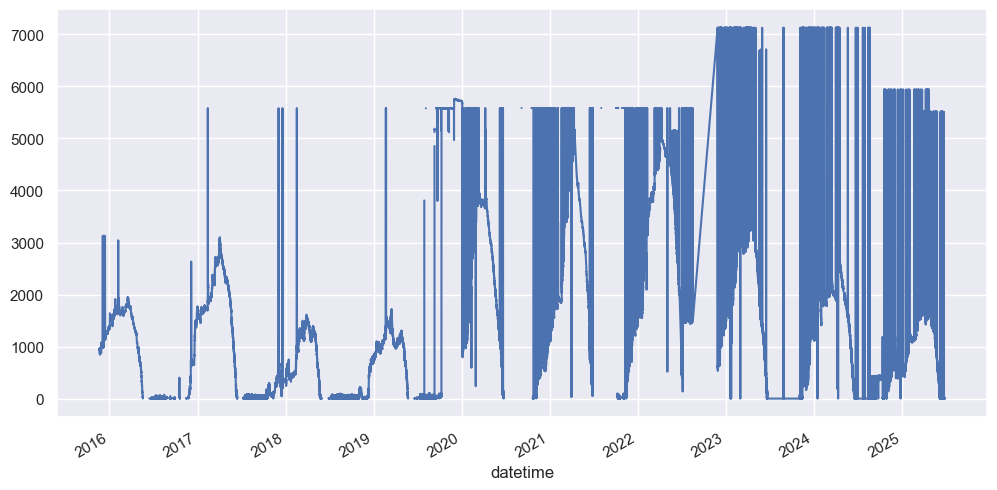

In [15]:
df_mesowest['snow_depth_set_1'] = pd.to_numeric(df_mesowest['snow_depth_set_1'], errors='coerce')
df_mesowest['snow_depth_set_1'].plot()

In [18]:
# convert mm to inches 
df_mesowest['snow_depth_set_1_inches'] = df_mesowest['snow_depth_set_1'] / 25.4  # convert mm to inches

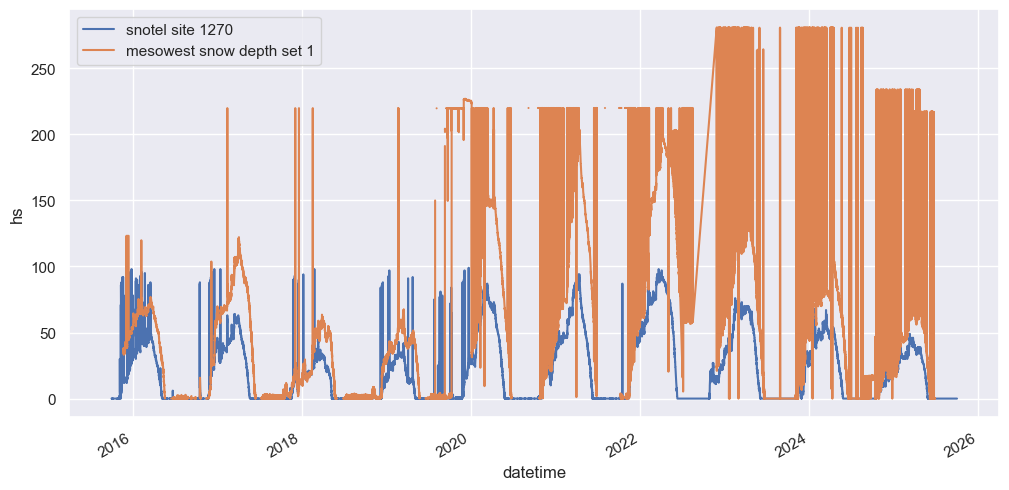

In [19]:
ds_site1270['hs'].plot()
df_mesowest['snow_depth_set_1_inches'].plot()

plt.legend(['snotel site 1270', 'mesowest snow depth set 1'])

In [ ]:
# first, make both dataframes timezone-naive so that we can join 
# ds_site1270_naive = ds_site1270.copy()
# ds_site1270_naive['datetime'] = ds_site1270_naive['datetime'].dt.tz_localize(None)
# ds_site1270_naive = ds_site1270_naive.set_index('datetime')
df_mesowest_naive = df_mesowest.copy()
df_mesowest_naive.index = df_mesowest_naive.index.tz_localize(None)
df_mesowest_naive.index.name = 'datetime'

In [37]:
ds_site1270

<xarray.Dataset> Size: 8MB
Dimensions:   (datetime: 79654)
Coordinates:
  * datetime  (datetime) datetime64[ns] 637kB 2015-10-01 ... 2025-09-30T23:00:00
Data variables:
    site_id   (datetime) int32 319kB 1270 1270 1270 1270 ... 1270 1270 1270 1270
    swe       (datetime) float64 637kB 0.0 13.5 13.5 13.5 ... -99.9 -99.9 -99.9
    precip1   (datetime) float64 637kB 0.0 0.0 0.0 0.0 ... -99.9 -99.9 -99.9
    precip2   (datetime) float64 637kB 0.0 0.0 0.0 0.0 ... -99.9 -99.9 -99.9
    temp      (datetime) float64 637kB 3.6 3.6 3.3 3.1 ... -99.9 -99.9 -99.9
    hs        (datetime) float64 637kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    bat       (datetime) float64 637kB 13.02 13.0 12.99 ... 13.24 13.22 13.19
    wdir      (datetime) float64 637kB 330.0 13.0 21.0 ... -99.9 -99.9 -99.9
    ws_x      (datetime) float64 637kB 3.0 3.0 3.0 2.0 ... -99.9 -99.9 -99.9
    ws_v      (datetime) float64 637kB 1.0 0.0 0.0 0.0 ... -99.9 -99.9 -99.9
    rh        (datetime) float64 637kB 100.0 99.0 99.0 ... -99.9 -99.9 -99.9
    pres      (datetime) float64 637kB -99.9 -99.9 -99.9 ... -99.9 -99.9 -99.9

In [27]:
df_mesowest_naive

,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,snow_depth_set_1,precip_accum_set_1,volt_set_1,snow_interval_set_1,heat_index_set_1d,dew_point_temperature_set_1d,snow_depth_set_1_inches
datetime,,,,,,,,,,,
2014-01-09 15:00:00,PPSA2,2014-01-09T15:00:00Z,-1.43,91.9,NaN,NaN,NaN,NaN,NaN,-2.59,NaN
2014-01-09 15:30:00,PPSA2,2014-01-09T15:30:00Z,-1.38,92.0,NaN,NaN,NaN,NaN,NaN,-2.53,NaN
2014-01-09 16:00:00,PPSA2,2014-01-09T16:00:00Z,-1.38,91.9,NaN,NaN,NaN,NaN,NaN,-2.54,NaN
2014-01-09 16:30:00,PPSA2,2014-01-09T16:30:00Z,-1.38,91.9,NaN,NaN,NaN,NaN,NaN,-2.54,NaN
2014-01-09 17:00:00,PPSA2,2014-01-09T17:00:00Z,-1.38,91.8,NaN,NaN,NaN,NaN,NaN,-2.56,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-27 08:00:00,PPSA2,2025-06-27T08:00:00Z,8.31,94.0,3.81,2440.94,13.26,45.72,NaN,7.39,0.15
2025-06-27 09:00:00,PPSA2,2025-06-27T09:00:00Z,8.43,94.3,0.00,2440.94,13.26,48.26,NaN,7.56,0.00
2025-06-27 10:00:00,PPSA2,2025-06-27T10:00:00Z,8.61,93.3,0.00,2441.956,13.26,45.72,NaN,7.58,0.00


In [41]:
ds_site1270_pandas = ds_site1270.to_dataframe()
ds_site1270_pandas.index = ds_site1270_pandas.index.tz_localize(None)
df_mesowest_naive.index = df_mesowest_naive.index.tz_localize(None)

In [ ]:
ds_site1270_pandas = ds_site1270_pandas[~ds_site1270_pandas.index.duplicated(keep='first')]
df_mesowest_naive = df_mesowest_naive[~df_mesowest_naive.index.duplicated(keep='first')]

In [43]:
ds_site1270_pandas

,site_id,swe,precip1,precip2,temp,hs,bat,wdir,ws_x,ws_v,rh,pres
datetime,,,,,,,,,,,,
2015-10-01 00:00:00,1270,0.0,0.0,0.0,3.6,0.0,13.02,330.0,3.0,1.0,100.0,-99.9
2015-10-01 01:00:00,1270,13.5,0.0,0.0,3.6,0.0,13.00,13.0,3.0,0.0,99.0,-99.9
2015-10-01 02:00:00,1270,13.5,0.0,0.0,3.3,0.0,12.99,21.0,3.0,0.0,99.0,-99.9
2015-10-01 03:00:00,1270,13.5,0.0,0.0,3.1,0.0,12.97,354.0,2.0,0.0,100.0,-99.9
2015-10-01 04:00:00,1270,13.5,0.0,0.0,2.6,0.0,12.96,343.0,2.0,1.0,101.0,-99.9
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-30 19:00:00,1270,-99.9,-99.9,-99.9,-99.9,0.0,13.29,-99.9,-99.9,-99.9,-99.9,-99.9
2025-09-30 20:00:00,1270,-99.9,-99.9,-99.9,-99.9,0.0,13.26,-99.9,-99.9,-99.9,-99.9,-99.9
2025-09-30 21:00:00,1270,-99.9,-99.9,-99.9,-99.9,0.0,13.24,-99.9,-99.9,-99.9,-99.9,-99.9


In [70]:
df_snow = pd.concat(
    [
        ds_site1270_pandas['hs'].rename('snotel'),
        df_mesowest_naive['snow_depth_set_1_inches'].rename('powderpatch')
    ],
    axis=1
)


<Axes: xlabel='datetime'>

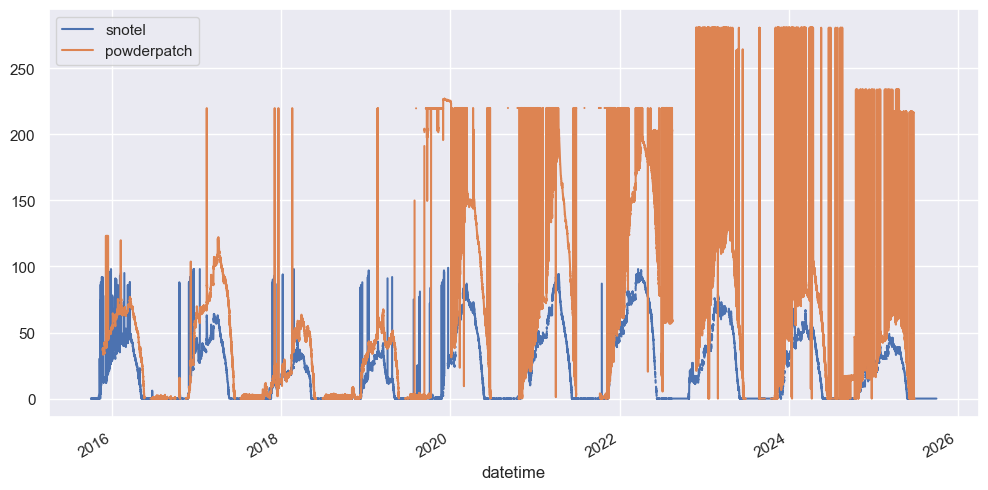

In [71]:
df_snow.plot()

<Axes: xlabel='datetime'>

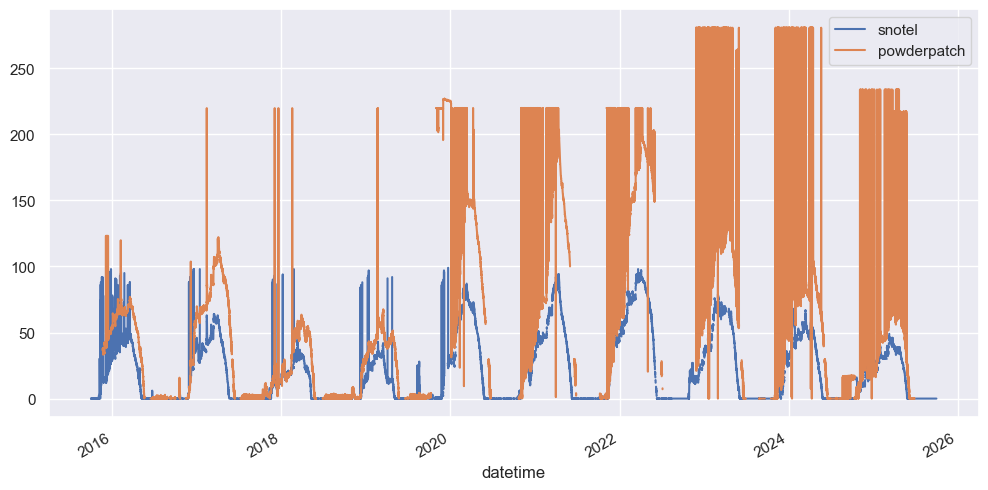

In [ ]:
# Replace snow depth values >30 in June–October with NaN
summer_months = [6, 7, 8, 9, 10]
df_snow.loc[df_snow.index.month.isin(summer_months) & (df_snow['powderpatch'] > 30), 'powderpatch'] = np.nan
df_snow.loc[df_snow.index.month.isin(summer_months) & (df_snow['snotel'] > 30), 'snotel'] = np.nan
df_snow.plot()

<Axes: xlabel='datetime'>

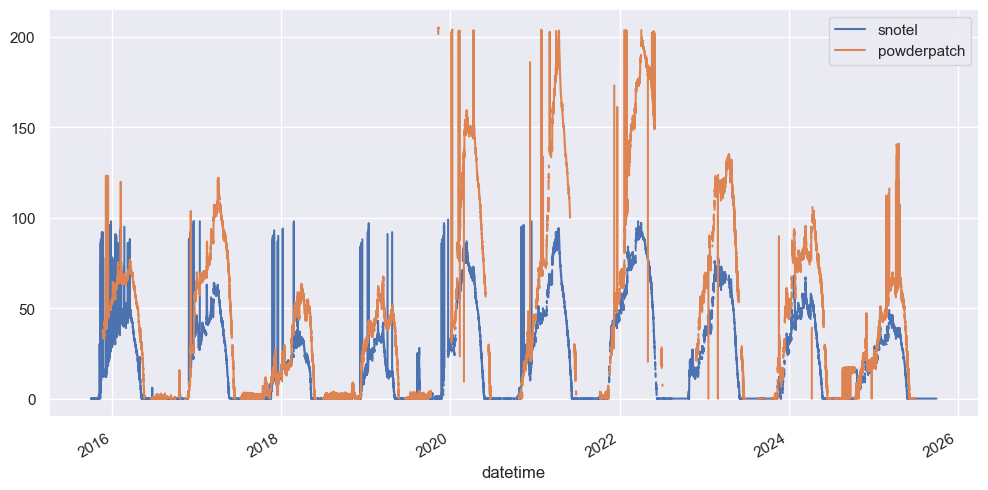

In [74]:
# and remove all values above 210, make nan 
df_snow.loc[df_snow['powderpatch'] > 210, 'powderpatch'] = np.nan
df_snow.loc[df_snow['snotel'] > 210, 'snotel'] = np.nan
df_snow.plot()

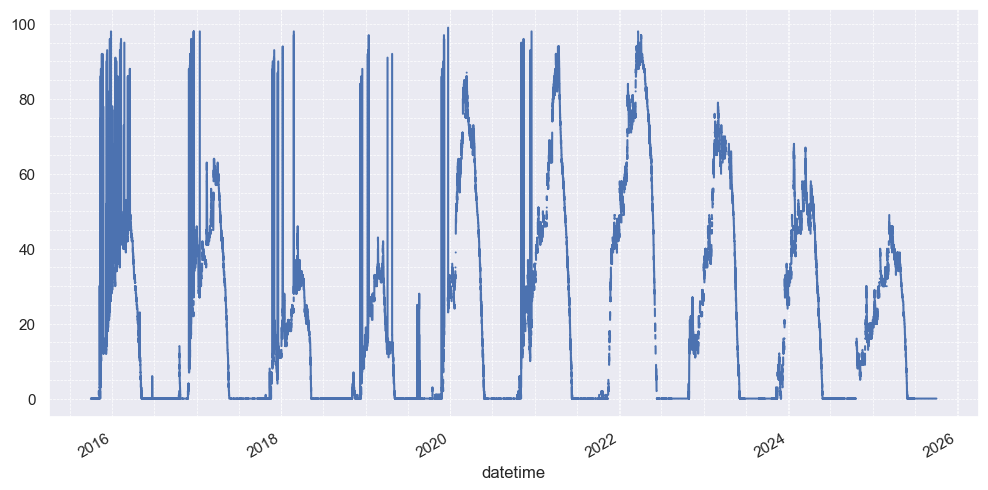

In [76]:
# df_snow['powderpatch'].plot()
df_snow['snotel'].plot()
# add extra gridlines for every 10 units
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()

Clean up max values for each water year and variable to start...

In [79]:
# --- 1️⃣  Define water year from datetime index ---
def water_year(dt):
    """Return the water year for a given datetime (Oct–Sep)."""
    return dt.year + 1 if dt.month >= 10 else dt.year

df_snow['WY'] = df_snow.index.map(water_year)

# --- 2️⃣  Define max allowable values per year (edit easily here) ---
max_values = {
    2016: {'powderpatch': 90, 'snotel': 60},
    2017: {'powderpatch': 130, 'snotel': 70},  # <-- replace with actual values later
    2018: {'powderpatch': 70, 'snotel': 50},
    2019: {'powderpatch': 80, 'snotel': 50},
    2020: {'powderpatch': 170, 'snotel': 85},
    2021: {'powderpatch': 200, 'snotel': 95},
    2022: {'powderpatch': 200, 'snotel': 100},
    2023: {'powderpatch': 150, 'snotel': 100},
    2024: {'powderpatch': 150, 'snotel': 60},
    2025: {'powderpatch': 100, 'snotel': 60},
}

# --- 3️⃣  Apply thresholds per water year ---
def apply_thresholds(row):
    wy = row['WY']
    if wy in max_values:
        thresholds = max_values[wy]
        # replace with NaN if exceeding threshold
        if row['powderpatch'] > thresholds['powderpatch']:
            row['powderpatch'] = np.nan
        if row['snotel'] > thresholds['snotel']:
            row['snotel'] = np.nan
    return row

df_snow = df_snow.apply(apply_thresholds, axis=1)

<Axes: xlabel='datetime'>

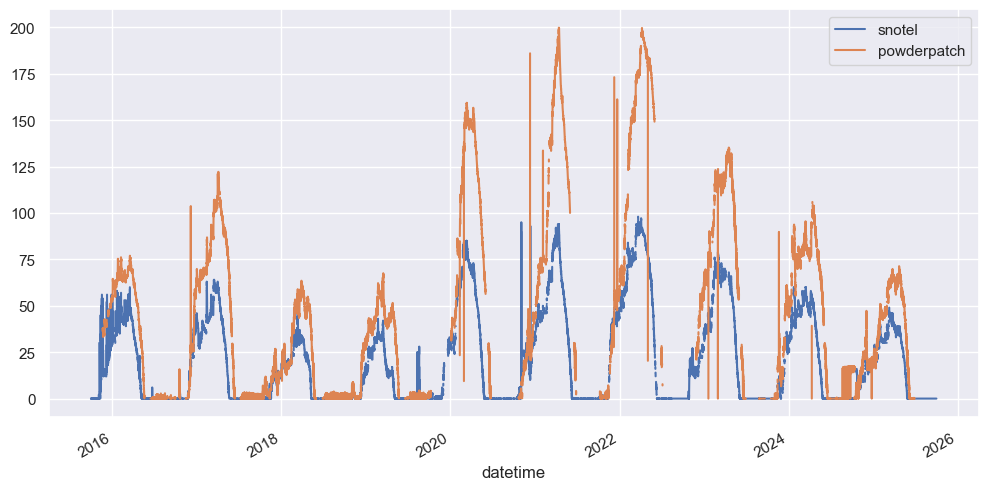

In [80]:
df_snow.drop(columns=['WY'], inplace=True)
df_snow.plot()

<Axes: xlabel='datetime'>

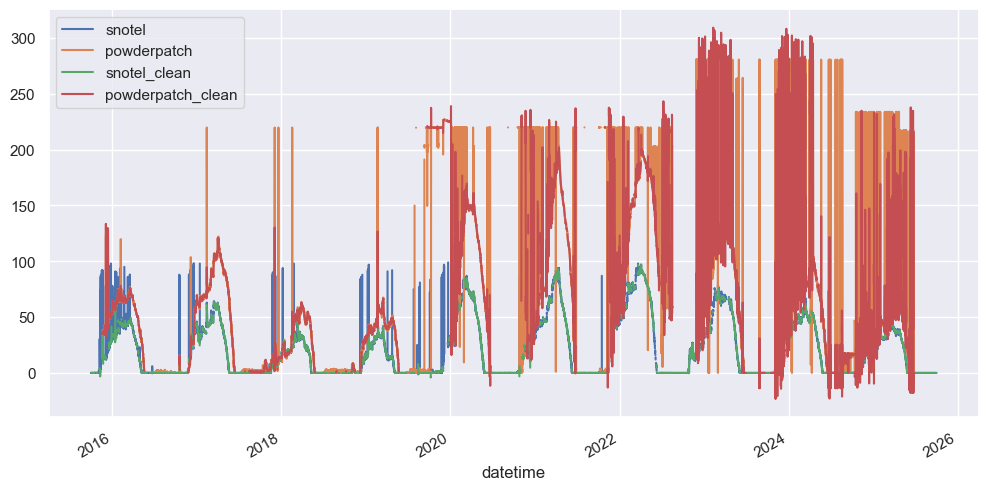

In [59]:
# Now use non-parametric lowees to clean the two variables in the timeseries
df_snow_clean = df_snow.copy()
df_snow_clean['snotel_clean'] = scipy.signal.savgol_filter(df_snow['snotel'], window_length=25, polyorder=2)
df_snow_clean['powderpatch_clean'] = scipy.signal.savgol_filter(df_snow['powderpatch'], window_length=25, polyorder=2)
df_snow_clean.plot()

<Axes: xlabel='datetime'>

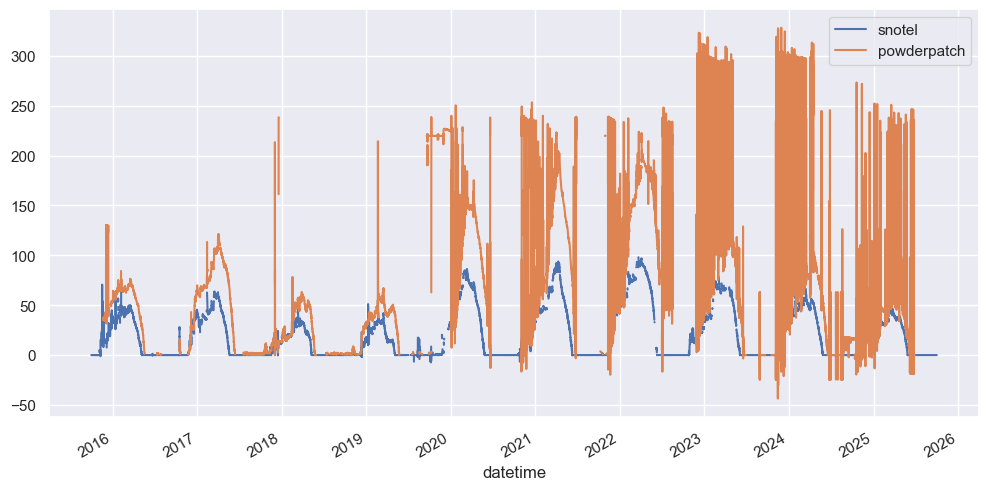

In [60]:
# Now use non-parametric lowees to clean the two variables in the timeseries
length = 10
order = 2

df_snow_clean = df_snow.copy()
df_snow_clean['snotel'] = scipy.signal.savgol_filter(df_snow['snotel'], window_length=length, polyorder=order)
df_snow_clean['powderpatch'] = scipy.signal.savgol_filter(df_snow['powderpatch'], window_length=length, polyorder=order)
df_snow_clean.plot()

LOWESS Smoothing

In [55]:
from statsmodels.nonparametric.smoothers_lowess import lowess


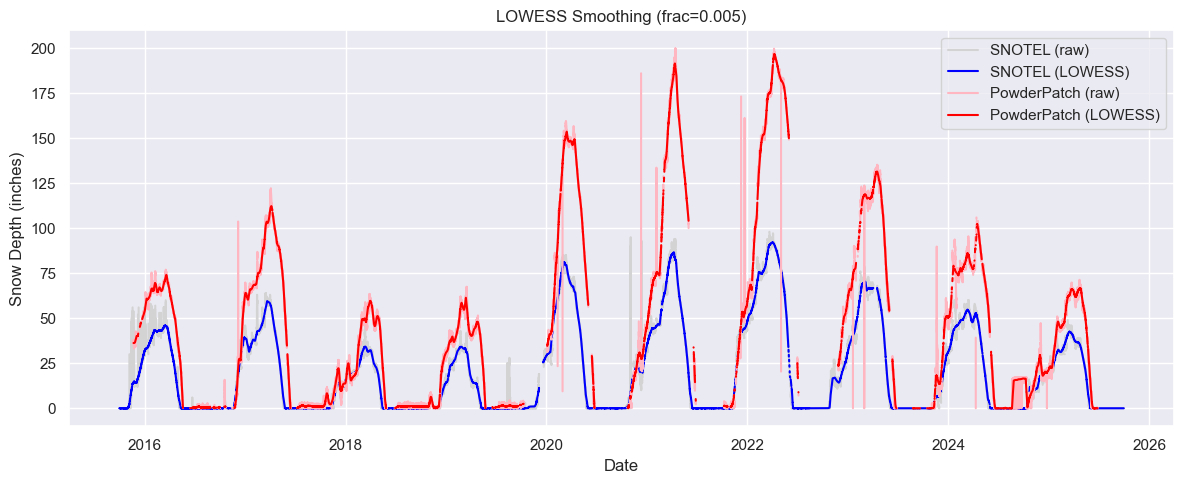

In [85]:
# Set smoothing fraction (adjust 0.02–0.05 for more/less smoothing)
# frac = 0.02
frac = 0.005

# Apply LOWESS smoothing to each variable
lowess_snotel = lowess(df_snow['snotel'], df_snow.index.values, frac=frac, return_sorted=False)
lowess_powerpatch = lowess(df_snow['powderpatch'], df_snow.index.values, frac=frac, return_sorted=False)

# Add to dataframe
df_snow['snotel_smooth'] = lowess_snotel
df_snow['powderpatch_smooth'] = lowess_powerpatch

# Replace negative smoothed values with NaN
df_snow.loc[df_snow['snotel_smooth'] < 0, 'snotel_smooth'] = np.nan
df_snow.loc[df_snow['powderpatch_smooth'] < 0, 'powderpatch_smooth'] = np.nan

# Optional: plot comparison
plt.figure(figsize=(12, 5))
plt.plot(df_snow.index, df_snow['snotel'], color='lightgray', label='SNOTEL (raw)')
plt.plot(df_snow.index, df_snow['snotel_smooth'], color='blue', label='SNOTEL (LOWESS)')
plt.plot(df_snow.index, df_snow['powderpatch'], color='lightpink', label='PowderPatch (raw)')
plt.plot(df_snow.index, df_snow['powderpatch_smooth'], color='red', label='PowderPatch (LOWESS)')
plt.legend()
plt.title(f"LOWESS Smoothing (frac={frac})")
plt.xlabel("Date")
plt.ylabel("Snow Depth (inches)")
plt.tight_layout()
plt.show()

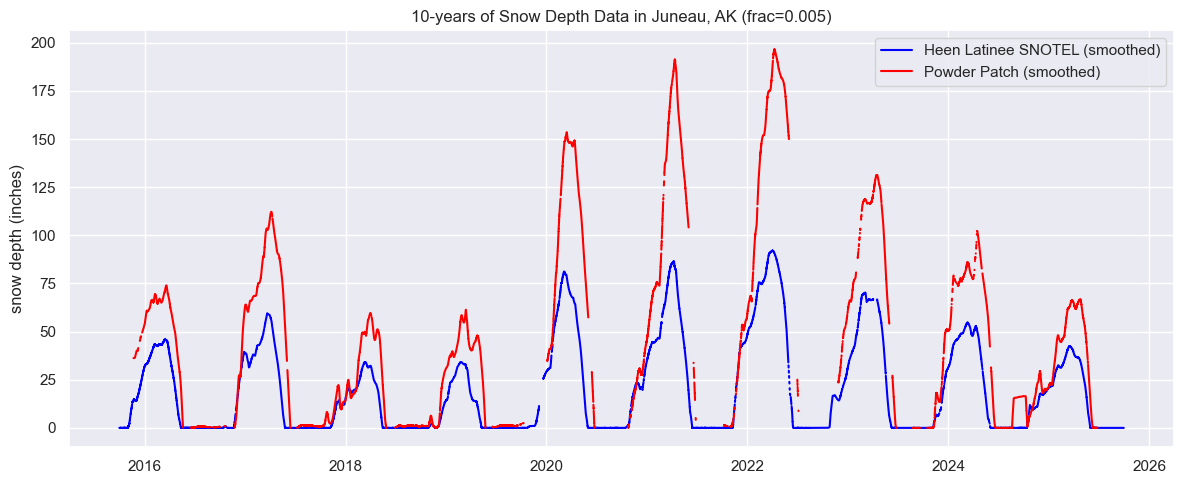

In [88]:
# Optional: plot comparison
plt.figure(figsize=(12, 5))
# plt.plot(df_snow.index, df_snow['snotel'], color='lightgray', label='Heen Latinee SNOTEL (raw)')
plt.plot(df_snow.index, df_snow['snotel_smooth'], color='blue', label='Heen Latinee SNOTEL (smoothed)')
# plt.plot(df_snow.index, df_snow['powderpatch'], color='lightpink', label='Powder Patch (raw)')
plt.plot(df_snow.index, df_snow['powderpatch_smooth'], color='red', label='Powder Patch (smoothed)')
plt.legend()
plt.title(f"10-years of Snow Depth Data in Juneau, AK (frac={frac})")
plt.xlabel("")
plt.ylabel("snow depth (inches)")
plt.tight_layout()
plt.show()